# Load data

In [ ]:
!gdown 1qsODNvi_itD8c6rBD5-NKSLG9jPQODig

Downloading...
From: https://drive.google.com/uc?id=1qsODNvi_itD8c6rBD5-NKSLG9jPQODig
To: /content/mbti_full_pull.csv
100% 599M/599M [00:02<00:00, 240MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('/content/mbti_full_pull.csv')
df

,author_flair_text,body,subreddit
0,INTJ,Knowing you're in INTJ is a tool for you to us...,intj
1,INTJ,You are truly an enlightened mastermind.,intj
2,"INFJ, 26F",You should :) it will help if you have a down ...,infj
3,INTP,I watch a bit of everything (including hentai)...,INTP
4,INTJ,I don't know if I would count this as a pet pe...,intj
...,...,...,...
1794011,INTP,Remind me! 40 hours,INTP
1794012,INTJ,We are seeing the start of a process that is g...,intj
1794013,INTJ,[NSFDL. I cry laughing at this every single ti...,intj
1794014,INFJ,Ravenclaw!,infj


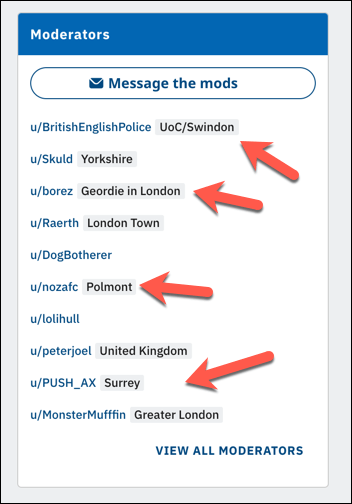


subreddit : 레딧 내의 커뮤니티 소분류

flair : user가 자신의 이름 옆에 기재하는 작은 태그(이미지 내 회색 박스)

# Data EDA

In [ ]:
mbti_dic = {
    'INFP' : [], 
    'ISFP' : [], 
    'INFJ' : [], 
    'ISFJ' : [], 
    'ENFP' : [], 
    'ESFP' : [], 
    'ENFJ' : [], 
    'ESFJ' : [], 
    'INTP' : [], 
    'ISTP' : [], 
    'INTJ' : [], 
    'ISTJ' : [], 
    'ENTP' : [], 
    'ESTP' : [], 
    'ENTJ' : [], 
    'ESTJ' : []
}

### Data distribution

In [ ]:
# MBTI = ['INFP', 'ISFP', 'INFJ', 'ISFJ', 'ENFP', 'ESFP', 'ENFJ', 'ESFJ', 'INTP', 'ISTP', 'INTJ', 'ISTJ', 'ENTP', 'ESTP', 'ENTJ', 'ESTJ']
for mbti in mbti_dic.keys():
  cnt = 0
  for i in df['author_flair_text']:
    if mbti in i or mbti.lower() in i:
      cnt += 1
  mbti_dic[mbti] = cnt
  # print(mbti, ' : ', cnt, end='\n')


sort_data = sorted(mbti_dic.items(), key=lambda x: x[1], reverse=True)
for i in sort_data:
    print(i[0], " : ", i[1])

INTP  :  472830
INTJ  :  363499
ENTP  :  217698
INFJ  :  206890
INFP  :  181865
ENFP  :  98203
ISTP  :  55298
ENTJ  :  48119
ESTP  :  45606
ENFJ  :  21507
ISTJ  :  18437
ISFP  :  11532
ISFJ  :  8366
ESFP  :  7486
ESTJ  :  6525
ESFJ  :  2795


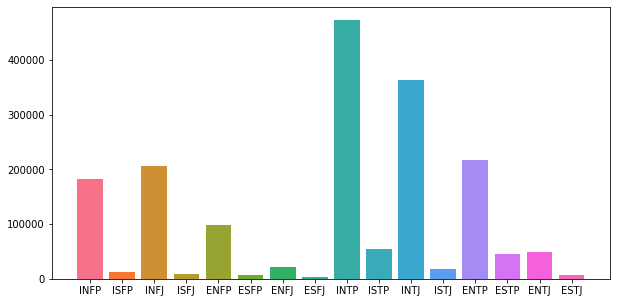

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
palette = sns.color_palette("husl", len(mbti_dic))
ind = np.arange(len(mbti_dic))

plt.bar(ind, list(mbti_dic.values()), color=palette)
plt.xticks(ind, list(mbti_dic.keys()))
plt.show()

### Distribution words per sentence

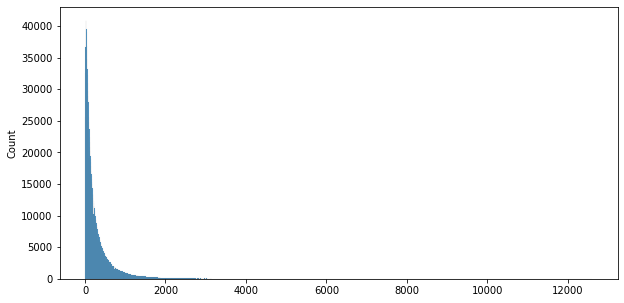

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sent_len = [len(str(i)) for i in df.body]
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(ax=ax, data=sent_len)

# Preprocessing

### author 대문자로 라벨 통일

In [ ]:
MBTI = ['INFP', 'ISFP', 'INFJ', 'ISFJ', 'ENFP', 'ESFP', 'ENFJ', 'ESFJ', 'INTP', 'ISTP', 'INTJ', 'ISTJ', 'ENTP', 'ESTP', 'ENTJ', 'ESTJ']
for i in range(len(MBTI)):
    df.loc[df['author_flair_text'].str.upper().str.contains(MBTI[i]), "author_flair_text"]= MBTI[i]

In [ ]:
df.author_flair_text.value_counts()

INTP    472944
INTJ    365194
ENTP    221555
INFJ    207368
INFP    182402
ENFP     98134
ISTP     64831
ESTP     53141
ENTJ     50990
ENFJ     21571
ISTJ     18260
ISFP     11587
ISFJ      8282
ESFP      7731
ESTJ      7232
ESFJ      2794
Name: author_flair_text, dtype: int64

# Remove 1st

### 필요없는 열 제거

In [ ]:
df.drop(columns=['subreddit'], inplace=True)
df

,author_flair_text,body
0,INTJ,Knowing you're in INTJ is a tool for you to us...
1,INTJ,You are truly an enlightened mastermind.
2,INFJ,You should :) it will help if you have a down ...
3,INTP,I watch a bit of everything (including hentai)...
4,INTJ,I don't know if I would count this as a pet pe...
...,...,...
1794011,INTP,Remind me! 40 hours
1794012,INTJ,We are seeing the start of a process that is g...
1794013,INTJ,[NSFDL. I cry laughing at this every single ti...
1794014,INFJ,Ravenclaw!


### 본문 null 제거 & 빈 것 제거

In [ ]:
df.dropna(subset=['body'], inplace = True)
df

,author_flair_text,body
0,INTJ,Knowing you're in INTJ is a tool for you to us...
1,INTJ,You are truly an enlightened mastermind.
2,INFJ,You should :) it will help if you have a down ...
3,INTP,I watch a bit of everything (including hentai)...
4,INTJ,I don't know if I would count this as a pet pe...
...,...,...
1794011,INTP,Remind me! 40 hours
1794012,INTJ,We are seeing the start of a process that is g...
1794013,INTJ,[NSFDL. I cry laughing at this every single ti...
1794014,INFJ,Ravenclaw!


In [ ]:
df.drop(df[df.body == ''].index, inplace=True)

# Check duplicated


In [ ]:
df[df.duplicated()].body.value_counts()

Yes.                                                                                                                                                                            664
lol                                                                                                                                                                             584
No.                                                                                                                                                                             507
Yes                                                                                                                                                                             474
:)                                                                                                                                                                              427
                                                                                                    

# Remove 2nd


### 본문 전처리(링크 날리기)

In [ ]:
import re
def remove_https(df):
    #  HTTP 문자열 삭제
    df["body"] = df["body"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', str(x).replace("|"," ") + " "))
    df=df.drop(df[df['body'].str.contains('https')].index)
    return df

In [ ]:
df= remove_https(df)
df

,author_flair_text,body
0,INTJ,Knowing you're in INTJ is a tool for you to us...
1,INTJ,You are truly an enlightened mastermind.
2,INFJ,You should :) it will help if you have a down ...
3,INTP,I watch a bit of everything (including hentai)...
4,INTJ,I don't know if I would count this as a pet pe...
...,...,...
1794011,INTP,Remind me! 40 hours
1794012,INTJ,We are seeing the start of a process that is g...
1794013,INTJ,[NSFDL. I cry laughing at this every single ti...
1794014,INFJ,Ravenclaw!


### null 된 본문 있는지 확인

In [ ]:
df.isnull().sum()

author_flair_text    0
body                 0
dtype: int64

# Change

### 인덱스 reset

In [ ]:
df.reset_index(drop=True, inplace=True)
df

,author_flair_text,body
0,INTJ,Knowing you're in INTJ is a tool for you to us...
1,INTJ,You are truly an enlightened mastermind.
2,INFJ,You should :) it will help if you have a down ...
3,INTP,I watch a bit of everything (including hentai)...
4,INTJ,I don't know if I would count this as a pet pe...
...,...,...
1793944,INTP,Remind me! 40 hours
1793945,INTJ,We are seeing the start of a process that is g...
1793946,INTJ,[NSFDL. I cry laughing at this every single ti...
1793947,INFJ,Ravenclaw!


In [ ]:
df_istp = df[(df['author_flair_text']=='ISTP')]

df_istp

,author_flair_text,body
17,ISTP,Adding!
74,ISTP,Google defines it as:\n\n&gt;adjective\n\n&gt;...
145,ISTP,No. It's enough to know I'm right and it isn't...
150,ISTP,The biggest Socialist parties here are Trots lol
159,ISTP,"Clothes I spend money on; nice running shoes, ..."
...,...,...
1793783,ISTP,I could probably just do a side hustle while p...
1793790,ISTP,Aang's control of the Avatar state increased ...
1793797,ISTP,Are you actually any INTP? I thought you guys ...
1793878,ISTP,"The technology market upgrades quickly, prices..."


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_freq = df_istp['body'].to_dict()

wordcloud = WordCloud().generate_from_frequencies(word_freq)

plt.imshow(wordcloud)

plt.show()

# Save

In [ ]:
df

,author_flair_text,body
0,INTJ,Knowing you're in INTJ is a tool for you to us...
1,INTJ,You are truly an enlightened mastermind.
2,INFJ,You should :) it will help if you have a down ...
3,INTP,I watch a bit of everything (including hentai)...
4,INTJ,I don't know if I would count this as a pet pe...
...,...,...
1793944,INTP,Remind me! 40 hours
1793945,INTJ,We are seeing the start of a process that is g...
1793946,INTJ,[NSFDL. I cry laughing at this every single ti...
1793947,INFJ,Ravenclaw!


# Abstraction each lables per 2700

In [ ]:
df2700 = pd.concat([df[df['author_flair_text'].str.upper().str.contains(MBTI[i])].sample(2700) for i in range(len(MBTI))])

In [ ]:
df2700

,author_flair_text,body
1585760,INFP,"I feel you, man. Performance anxiety is a toug..."
763345,INFP,"Wow, yeah, I get this a lot too. I don't think..."
1354657,INFP,See
1303028,INFP,"&gt; The reward will always outweigh the risk,..."
830868,INFP,What are you waiting for? Put the fucking ENFP...
...,...,...
620543,ESTJ,I guess we interpreted the question differentl...
1011693,ESTJ,"So.... I had never played the campaign, and I ..."
1472920,ESTJ,"INFJ: Think they're saving the world, really r..."
1032327,ESTJ,Depending on what type of residence it is and ...


In [ ]:
def label(df):
  for idx, mbti in enumerate(MBTI):
    if df['author_flair_text'] == mbti:
      return idx
df2700['label'] = df2700.apply(lambda row: label(row), axis=1)
df2700

,author_flair_text,body,label
1585760,INFP,"I feel you, man. Performance anxiety is a toug...",0
763345,INFP,"Wow, yeah, I get this a lot too. I don't think...",0
1354657,INFP,See,0
1303028,INFP,"&gt; The reward will always outweigh the risk,...",0
830868,INFP,What are you waiting for? Put the fucking ENFP...,0
...,...,...,...
620543,ESTJ,I guess we interpreted the question differentl...,15
1011693,ESTJ,"So.... I had never played the campaign, and I ...",15
1472920,ESTJ,"INFJ: Think they're saving the world, really r...",15
1032327,ESTJ,Depending on what type of residence it is and ...,15


In [ ]:
df2700.reset_index(inplace=True, drop=True)

In [ ]:
with open('./final_2700.pkl', 'wb') as f:
  pickle.dump(df2700, f)

# Labeling Dataset(16분류)

In [ ]:
# [I,E] [N,S] [F,T] [P,J] Label column add 
df['I']= 0
df.loc[df['author_flair_text'].str.upper().str.contains('I'),'I']=1
df['N']=0
df.loc[df['author_flair_text'].str.upper().str.contains('N'),'N']=1
df['F']=0
df.loc[df['author_flair_text'].str.upper().str.contains('F'),'F']=1
df['P']=0
df.loc[df['author_flair_text'].str.upper().str.contains('P'),'P']=1
# df.sample(5)

In [ ]:
df

,author_flair_text,body,I,N,F,P
0,INTJ,Knowing you're in INTJ is a tool for you to us...,1,1,0,0
1,INTJ,You are truly an enlightened mastermind.,1,1,0,0
2,INFJ,You should :) it will help if you have a down ...,1,1,1,0
3,INTP,I watch a bit of everything (including hentai)...,1,1,0,1
4,INTJ,I don't know if I would count this as a pet pe...,1,1,0,0
...,...,...,...,...,...,...
1793944,INTP,Remind me! 40 hours,1,1,0,1
1793945,INTJ,We are seeing the start of a process that is g...,1,1,0,0
1793946,INTJ,[NSFDL. I cry laughing at this every single ti...,1,1,0,0
1793947,INFJ,Ravenclaw!,1,1,1,0


In [ ]:
import pickle
with open('./final.pkl', 'wb') as f:
  pickle.dump(df, f)